<a href="https://colab.research.google.com/github/MithilaCoomaraswamy/DSGP/blob/Period-Tracker/PeriodTrackerRecurrentNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import Input
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, r2_score

In [39]:
df = pd.read_csv('PeriodData.csv')
np.random.seed(0)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1665 non-null   object
 1   CycleNumber                 1665 non-null   int64 
 2   Group                       1665 non-null   int64 
 3   CycleWithPeakorNot          1665 non-null   int64 
 4   ReproductiveCategory        1665 non-null   int64 
 5   LengthofCycle               1665 non-null   int64 
 6   MeanCycleLength             1665 non-null   object
 7   EstimatedDayofOvulation     1665 non-null   object
 8   LengthofLutealPhase         1665 non-null   object
 9   FirstDayofHigh              1665 non-null   object
 10  TotalNumberofHighDays       1665 non-null   object
 11  TotalHighPostPeak           1665 non-null   object
 12  TotalNumberofPeakDays       1665 non-null   object
 13  TotalDaysofFertility        1665 non-null   obje

In [41]:
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,TotalNumberofPeakDays,TotalDaysofFertility,TotalFertilityFormula,LengthofMenses,MeanMensesLength,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,MensesScoreDaySix,MensesScoreDaySeven,MensesScoreDayEight,MensesScoreDayNine,MensesScoreDayTen,MensesScoreDay11,MensesScoreDay12,MensesScoreDay13,MensesScoreDay14,MensesScoreDay15,TotalMensesScore,MeanBleedingIntensity,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding,PhasesBleeding,IntercourseDuringUnusBleed,Age,AgeM,Maristatus,MaristatusM,Yearsmarried,Wedding,Religion,ReligionM,Ethnicity,EthnicityM,Schoolyears,SchoolyearsM,OccupationM,IncomeM,Height,Weight,Reprocate,Numberpreg,Livingkids,Miscarriages,Abortions,Medvits,Medvitexplain,Gynosurgeries,LivingkidsM,Boys,Girls,MedvitsM,MedvitexplainM,Urosurgeries,Breastfeeding,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,5,0,2,9,15,5,4.49,3,3,2,1,1,,,,,,,,,,,10,9.04,5,1,0,,,36,39,0,0,10,,0,0,0,0,8,8,3,5,63,120,0,3,3,0,0,0,,,,,,0,,,0,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,2,0,2,6,13,5,,3,3,2,1,1,,,,,,,,,,,10,,6,1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,1,0,2,5,13,5,,3,3,2,1,1,,,,,,,,,,,10,,5,1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,2,0,2,6,13,5,,3,3,3,2,1,,,,,,,,,,,12,,3,0,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,4,0,2,8,14,5,,3,3,2,2,1,,,,,,,,,,,11,,5,1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [42]:
columns = df.columns
print(columns)

Index(['ClientID', 'CycleNumber', 'Group', 'CycleWithPeakorNot',
       'ReproductiveCategory', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo',
       'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive',
       'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight',
       'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11',
       'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14',
       'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       'Age', 'AgeM', 'Maristatus', 'MaristatusM', 'Yearsmarried', 'Wedding

In [43]:
df = df[['ClientID', 'CycleNumber', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'LengthofMenses',
       'MeanMensesLength']]

In [44]:
df.head()

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17,12,5,4.49
1,nfp8122,2,27,,15,12,5,
2,nfp8122,3,29,,15,14,5,
3,nfp8122,4,27,,15,12,5,
4,nfp8122,5,28,,16,12,5,


In [45]:
df['MeanCycleLength'] = df.groupby('ClientID')['MeanCycleLength'].transform('first')
df['MeanMensesLength'] = df.groupby('ClientID')['MeanMensesLength'].transform('first')

In [46]:
df.head()

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17,12,5,4.49
1,nfp8122,2,27,27.33,15,12,5,4.49
2,nfp8122,3,29,27.33,15,14,5,4.49
3,nfp8122,4,27,27.33,15,12,5,4.49
4,nfp8122,5,28,27.33,16,12,5,4.49


In [47]:
df =df.replace(' ', np.nan)

In [48]:
df.infer_objects(copy=False)

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17,12,5,4.49
1,nfp8122,2,27,27.33,15,12,5,4.49
2,nfp8122,3,29,27.33,15,14,5,4.49
3,nfp8122,4,27,27.33,15,12,5,4.49
4,nfp8122,5,28,27.33,16,12,5,4.49
5,nfp8122,6,26,27.33,15,11,5,4.49
6,nfp8122,7,29,27.33,16,13,5,4.49
7,nfp8122,8,24,27.33,14,10,4,4.49
8,nfp8122,9,28,27.33,16,12,6,4.49
9,nfp8122,10,28,27.33,17,11,5,4.49


In [49]:
df.infer_objects(copy=False)

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17,12,5,4.49
1,nfp8122,2,27,27.33,15,12,5,4.49
2,nfp8122,3,29,27.33,15,14,5,4.49
3,nfp8122,4,27,27.33,15,12,5,4.49
4,nfp8122,5,28,27.33,16,12,5,4.49
5,nfp8122,6,26,27.33,15,11,5,4.49
6,nfp8122,7,29,27.33,16,13,5,4.49
7,nfp8122,8,24,27.33,14,10,4,4.49
8,nfp8122,9,28,27.33,16,12,6,4.49
9,nfp8122,10,28,27.33,17,11,5,4.49


In [50]:
columns_to_convert = ['MeanCycleLength', 'EstimatedDayofOvulation',	'LengthofLutealPhase',	'LengthofMenses',	'MeanMensesLength']
for col in columns_to_convert:
               df[col] = pd.to_numeric(df[col], errors='coerce')

In [51]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

ClientID                     0
CycleNumber                  0
LengthofCycle                0
MeanCycleLength            256
EstimatedDayofOvulation    150
LengthofLutealPhase        151
LengthofMenses               4
MeanMensesLength           268
dtype: int64


In [52]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
display(df)

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17.0,12.0,5.0,4.49
1,nfp8122,2,27,27.33,15.0,12.0,5.0,4.49
2,nfp8122,3,29,27.33,15.0,14.0,5.0,4.49
3,nfp8122,4,27,27.33,15.0,12.0,5.0,4.49
4,nfp8122,5,28,27.33,16.0,12.0,5.0,4.49
5,nfp8122,6,26,27.33,15.0,11.0,5.0,4.49
6,nfp8122,7,29,27.33,16.0,13.0,5.0,4.49
7,nfp8122,8,24,27.33,14.0,10.0,4.0,4.49
8,nfp8122,9,28,27.33,16.0,12.0,6.0,4.49
9,nfp8122,10,28,27.33,17.0,11.0,5.0,4.49


In [53]:
def fill_missing_menses_length(df):
    # Group by ClientID to process each unique ClientID
    for client_id, group in df.groupby('ClientID'):
        # If 'MeanMensesLength' is missing (NaN), calculate the mean of 'LengthofMenses'
        if group['MeanMensesLength'].isnull().any():
            mean_menses_length = group['LengthofMenses'].mean()

            # Fill missing MeanMensesLength with the calculated mean
            df.loc[df['ClientID'] == client_id, 'MeanMensesLength'] = df.loc[df['ClientID'] == client_id, 'MeanMensesLength'].fillna(mean_menses_length)

    return df

In [54]:
df = fill_missing_menses_length(df)

In [55]:
def fill_missing_cycle_length(df):
    # Group by ClientID to process each unique ClientID
    for client_id, group in df.groupby('ClientID'):
        # If 'MeanCycleLength' is missing (NaN), calculate the mean of 'LengthofCycle'
        if group['MeanCycleLength'].isnull().any():
            mean_cycle_length = group['LengthofCycle'].mean()

            # Fill missing MeanCycleLength with the calculated mean
            df.loc[df['ClientID'] == client_id, 'MeanCycleLength'] = df.loc[df['ClientID'] == client_id, 'MeanCycleLength'].fillna(mean_cycle_length)

    return df

In [56]:
df = fill_missing_cycle_length(df)

In [57]:
def fill_missing_luteal_phase(df):
    # Loop through each unique ClientID and calculate mean Luteal Phase length
    for client_id, group in df.groupby('ClientID'):
        # Calculate the mean of the existing Luteal Phase lengths for this ClientID
        mean_luteal_phase = group['LengthofLutealPhase'].mean()

        # If the mean Luteal Phase is not NaN, fill missing values with the mean
        if not pd.isna(mean_luteal_phase):
            df.loc[df['ClientID'] == client_id, 'LengthofLutealPhase'] = df.loc[df['ClientID'] == client_id, 'LengthofLutealPhase'].fillna(mean_luteal_phase)

    return df

In [58]:
df = fill_missing_luteal_phase(df)

In [59]:
def fill_missing_ovulation_day(df):
    # Loop through each unique ClientID and calculate mean Estimated Day of Ovulation
    for client_id, group in df.groupby('ClientID'):
        # Calculate the mean of the existing EstimatedDayofOvulation values for this ClientID
        mean_ovulation_day = group['EstimatedDayofOvulation'].mean()

        # If the mean is not NaN, fill missing values with the mean for the current ClientID
        if not pd.isna(mean_ovulation_day):
            df.loc[df['ClientID'] == client_id, 'EstimatedDayofOvulation'] = df.loc[df['ClientID'] == client_id, 'EstimatedDayofOvulation'].fillna(mean_ovulation_day)

    return df

In [60]:
df = fill_missing_ovulation_day(df)

In [61]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

ClientID                   0
CycleNumber                0
LengthofCycle              0
MeanCycleLength            0
EstimatedDayofOvulation    3
LengthofLutealPhase        3
LengthofMenses             4
MeanMensesLength           0
dtype: int64


In [62]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
print(rows_with_missing_values)

     ClientID  CycleNumber  LengthofCycle  MeanCycleLength  \
406   nfp8085            1             48            40.00   
407   nfp8085            2             32            40.00   
1047  nfp8226            1             24            24.00   
1107  nfp8237           18             25            25.85   
1298  nfp8276           10             27            26.58   
1340  nfp8282           14             29            32.07   
1664  nfp8334           11             24            29.63   

      EstimatedDayofOvulation  LengthofLutealPhase  LengthofMenses  \
406                       NaN                  NaN             6.0   
407                       NaN                  NaN             5.0   
1047                      NaN                  NaN             4.0   
1107                16.000000                  9.0             NaN   
1298                17.000000                 10.0             NaN   
1340                20.615385                 12.0             NaN   
1664         

In [63]:
df = df[df['ClientID'] != 'nfp8085']

In [64]:
df = df[df['ClientID'] != 'nfp8226' ]

In [65]:
df.loc[:, 'LengthofLutealPhase'] = df.groupby('ClientID')['LengthofLutealPhase'].transform(lambda x: x.fillna(x.mean()))
df.loc[:, 'LengthofMenses'] = df.groupby('ClientID')['LengthofMenses'].transform(lambda x: x.fillna(x.mean()))

In [66]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
print(rows_with_missing_values)

Empty DataFrame
Columns: [ClientID, CycleNumber, LengthofCycle, MeanCycleLength, EstimatedDayofOvulation, LengthofLutealPhase, LengthofMenses, MeanMensesLength]
Index: []


In [67]:
# Check for duplicate rows.
print(f"There are {df.duplicated().sum()} duplicate rows in the data set.")

# Remove duplicate rows.
df=df.drop_duplicates()
print("The duplicate rows were removed.")

There are 14 duplicate rows in the data set.
The duplicate rows were removed.


In [68]:
df = df.drop(columns=['ClientID'])
df = df.drop(columns=['LengthofLutealPhase'])

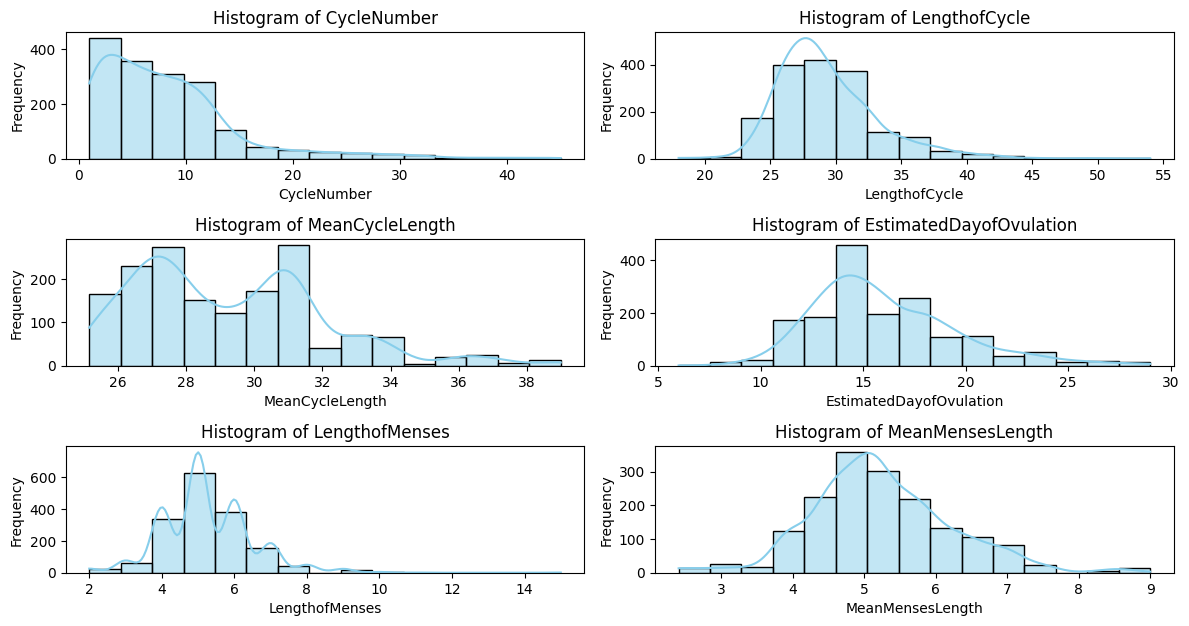

In [69]:
# Plot histograms
columns_to_plot = ['CycleNumber', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofMenses',
       'MeanMensesLength']

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[column], bins=15, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

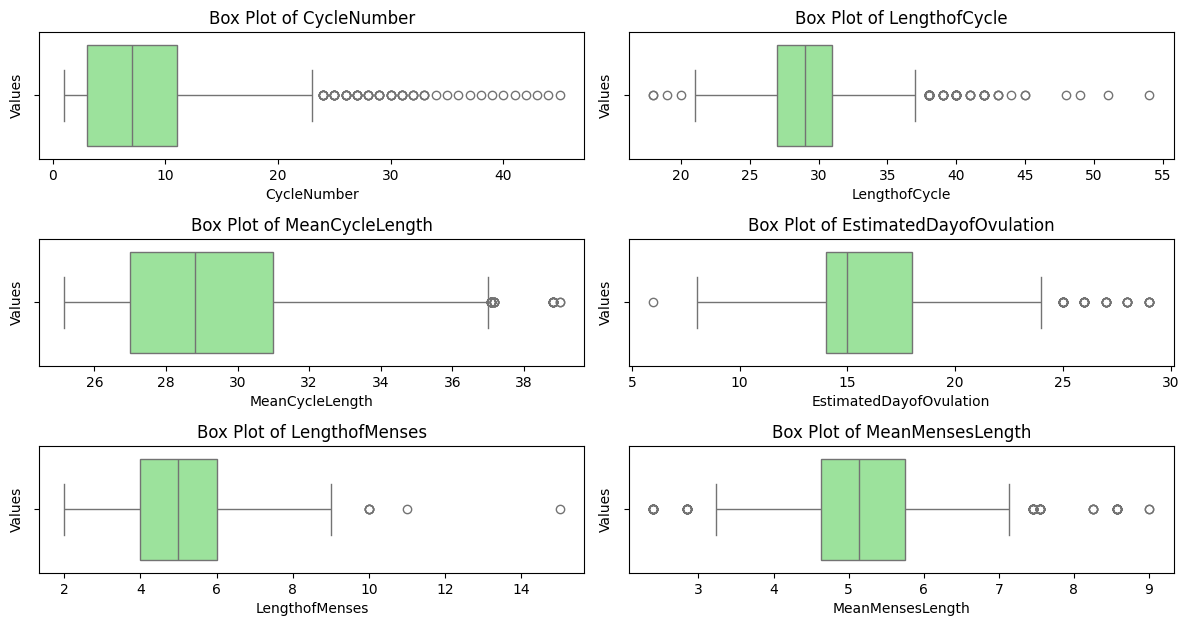

In [70]:
# Draw box plots to check for outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)  # 2 rows, 2 columns
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')

plt.tight_layout()

plt.show()

In [71]:
X = df.drop(columns=['EstimatedDayofOvulation'])  # All columns except 'y'
y = df['EstimatedDayofOvulation']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [74]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define input shape using Input layer
model.add(SimpleRNN(units=50, activation='relu'))  # Remove input_shape from SimpleRNN
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 99.4597 
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0594
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4178
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4605
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.2993
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1961
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3081
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5154
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.0414
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1226
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3564
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4265
Epoch 13/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0307
Epoch 14/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.0858
Epoch 15/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7134
Ep

In [76]:
# Predict on test data
y_pred = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [77]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Optimized Mean Squared Error: {mse}")
print(f"Optimized R-squared: {r2}")
print(f"Optimized Mean Absolute Error: {mae}")

Optimized Mean Squared Error: 5.296083690747324
Optimized R-squared: 0.5902155519767343
Optimized Mean Absolute Error: 1.7655100638023227


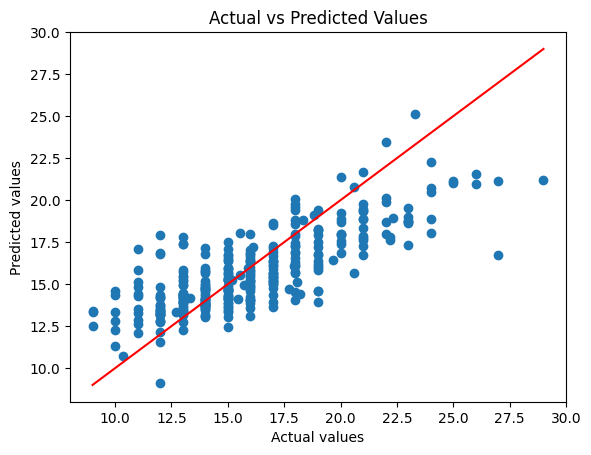

In [78]:
# Plotting the predictions vs actual values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted Values")
plt.show()

In [79]:
import joblib

# Save the best model found by GridSearchCV
joblib.dump(model, 'RNN.pkl')

print("Model saved successfully!")

Model saved successfully!
